In [6]:
%matplotlib_svg
import numpy as np
import pylab as pl
import cv2
from cv2 import cv

## 图像处理

### 二维卷积

将图像和某个卷积核进行卷积

使用filter2D()制作的各种图像处理效果

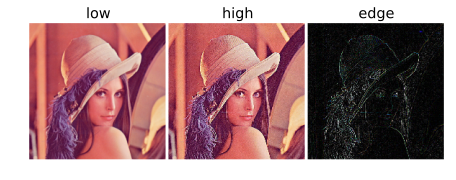

In [4]:
src = cv2.imread("lena.jpg")

kernels = [ 
    (u"low",np.array([[1,  1, 1],[1, 2, 1],[1, 1, 1]])*0.1),
    (u"high",np.array([[0.0, -1, 0],[-1, 5, -1],[0, -1, 0]])),
    (u"edge",np.array([[-1.0, -1, -1],[-1, 8, -1],[-1, -1, -1]]))
]

index = 0
fig, axes = pl.subplots(1, 3, figsize=(6,2))
for ax, (name, kernel) in zip(axes, kernels):
    dst = cv2.filter2D(src, -1, kernel)
    # 由于matplotlib的颜色顺序和OpenCV的顺序相反
    ax.imshow(dst[:, :, ::-1])
    ax.set_title(name)
    ax.axis("off")
fig.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)

`scpy2.opencv.filter2d_demo`：可通过图形界面自定义卷积核，并实时查看其处理结果。`

In [5]:
%exec_python -m scpy2.opencv.filter2d_demo

SepFilter进行分布卷积, 能大幅度的提高计算速度

In [7]:
img = np.random.rand(1000,1000) #❶

row = cv2.getGaussianKernel(7, -1) #❷
col = cv2.getGaussianKernel(5, -1)

kernel = np.dot(col[:], row[:].T) #❸

%time img2 = cv2.filter2D(img, -1, kernel) #❹
%time img3 = cv2.sepFilter2D(img, -1, row, col) #❺
print "error=", np.max(np.abs(img2[:] - img3[:]))

Wall time: 20 ms
Wall time: 45 ms
error= 4.4408920985e-16


### 形态学运算

* 开运算, 区分两个靠的很近的区域
* 闭运算, 连接两个考的很近的区域
* 形态梯度, 找到图像区域的边缘
* 顶帽运算, 原始图像减去开运算
* 黑帽运算, 闭运算减去原始图像

`scpy2.opencv.morphology_demo`：演示OpenCV中的各种形态学运算。

In [8]:
%exec_python -m scpy2.opencv.morphology_demo

### 填充-floodFill

演示floodFill()的填充效果

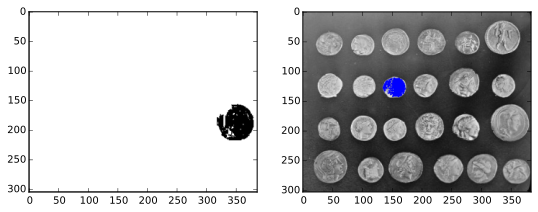

In [10]:
img = cv2.imread("coins.png")
seed1 = 344, 188
seed2 = 152, 126
diff = (13, 13, 13)
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(img, mask, seed1, (0, 0, 0), diff, diff, cv2.FLOODFILL_MASK_ONLY)
cv2.floodFill(img, None, seed2, (0, 0, 255), diff, diff)

fig, axes = pl.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(~mask, cmap="gray")
axes[1].imshow(img);

 `scpy2.opencv.floodfill_demo`：演示填充函数`floodFill()`的各个参数的用法。

In [11]:
%exec_python -m scpy2.opencv.floodfill_demo

### 去瑕疵-inpaint

`scpy2.opencv.inpaint_demo`：演示`inpaint()`的用法，用户用鼠标绘制需要去瑕疵的区域，程序实时显示运算结果。

In [13]:
%exec_python -m scpy2.opencv.inpaint_demo